<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/examples/experiments/previous_pca_tsne_tanimoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import walk
path = 'data/'
figure_path = 'figures/'
filenames = next(walk(path), (None, None, []))[2]
# print(filenames)
file_MACCS = []
for file in filenames:
    if 'MACCS' in file:
#         print(file)
        file_MACCS.append(file)
file_MACCS

['JAK2_MACCS.csv',
 'FLT3_MACCS.csv',
 'JAK3_MACCS.csv',
 'TYK2_MACCS.csv',
 'JAK1_MACCS.csv']

In [ ]:
# PCA for active inactive
# from functions import count_category
import pandas as pd
# PCA analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
import plotly.express as px
import numpy as np
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import MACCSkeys
import seaborn as sns

# input: X, y
# output: figure of PCA for active and inactive
def plot_PCA_0_1(X, y, title=None, savepath=None):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pDf = pd.DataFrame(data=pca.fit_transform(X),
                       columns=['principal component 1', 'principal component 2'])

    fDf = pd.concat([pDf, y], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    if title!=None:
        ax.set_title(title, fontsize = 20)
    targets = [0, 1]
    colors = ['b', 'r']
    for target, color in zip(targets,colors):
        if fDf.columns[2] == 'Activity' or fDf.columns[2] == 'value':
            indicesToKeep = fDf[fDf.columns[2]] == target
        else:
            print('PCA dataframe activity column wrong name')
            break
        ax.scatter(fDf.loc[indicesToKeep, 'principal component 1']
                   , fDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 5)
    ax.legend(targets)
    ax.grid()
    if savepath!=None:
        fig.savefig(savepath)




# input: X, y
# output: figure of tSNE for active and inactive
def plot_tSNE_0_1(X, y, title=None, savepath=None):
    tsne = TSNE(n_components=2, random_state=0)
    projections = tsne.fit_transform(X)
    pDf = pd.DataFrame(data=projections,
                           columns=['t-SNE 1', 't-SNE 2'])
    fDf = pd.concat([pDf, y], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('t-SNE 1', fontsize = 15)
    ax.set_ylabel('t-SNE 2', fontsize = 15)
    if title!=None:
        ax.set_title(title, fontsize = 20)
    targets = [0, 1]
    colors = ['b', 'r']
    for target, color in zip(targets,colors):
        if fDf.columns[2] == 'Activity' or fDf.columns[2] == 'value':
            indicesToKeep = fDf[fDf.columns[2]] == target
        else:
            print('t-SNE dataframe activity column wrong name')
            break
        ax.scatter(fDf.loc[indicesToKeep, 't-SNE 1']
                   , fDf.loc[indicesToKeep, 't-SNE 2']
                   , c = color
                   , s = 5)

    ax.legend(targets)
    ax.grid()
    if savepath!=None:
        fig.savefig(savepath)


def pairwise_similarity(fp_list):
    num = len(fp_list)
    similarities = np.zeros((num, num))
    for i in range(num-1):
            similarity = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
            similarities[i, :i] = similarity
            similarities[:i, i] = similarity

    return similarities

def plot_tanimoto(smiles, title=None, savepath=None):
    maccs_list = []
    for smi in smiles:
        mol = Chem.MolFromSmiles(smi)
        maccs = MACCSkeys.GenMACCSKeys(mol)
        maccs_list.append(maccs)

    similarities = pairwise_similarity(maccs_list)
    fig = plt.figure(figsize = (8,8))
    sns.heatmap(similarities, cmap='Blues', square=True)
    if title != None:
        plt.title(title, fontsize = 20)
    plt.show()
    if savepath != None:
        fig.savefig(savepath)

JAK2
data/JAK2_MACCS.csv
Drugs #:  10161
Active inhibitors #:  6846
Non inhibitors #:  3315
Unspecified #:  0


/Users/uranaieiko_1/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/uranaieiko_1/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


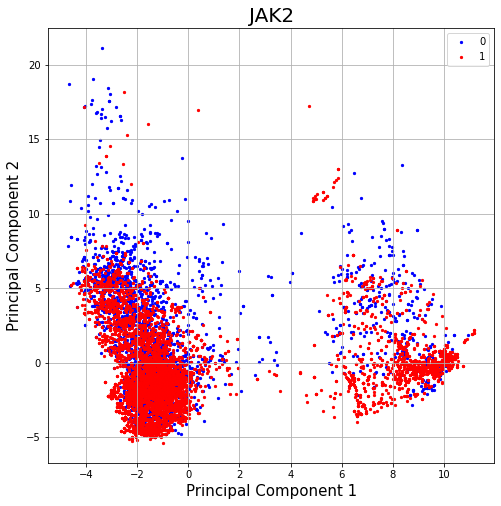

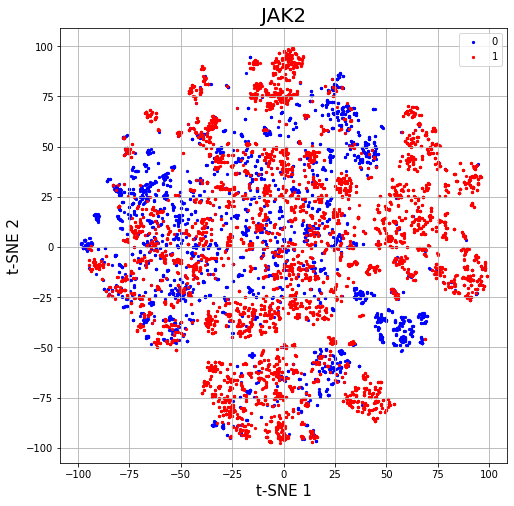

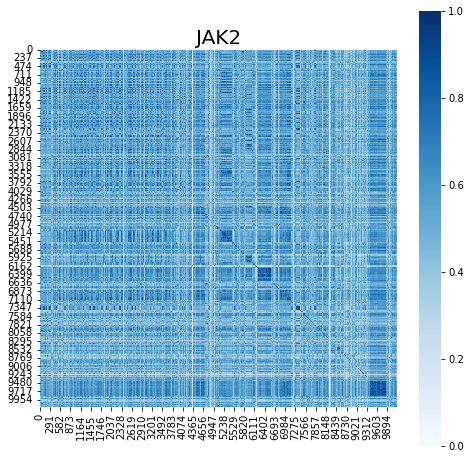

JAK3
data/JAK3_MACCS.csv
Drugs #:  7722
Active inhibitors #:  5250
Non inhibitors #:  2472
Unspecified #:  0


/Users/uranaieiko_1/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/uranaieiko_1/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


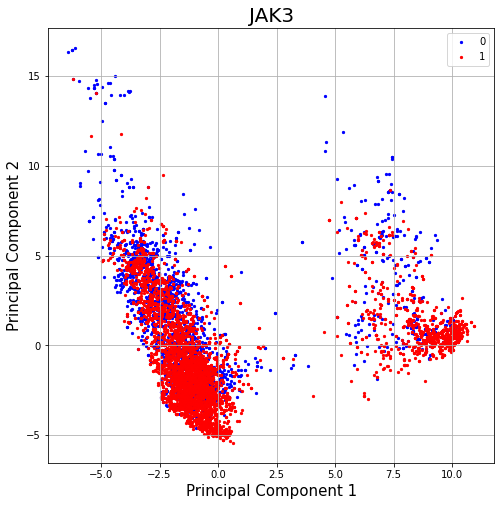

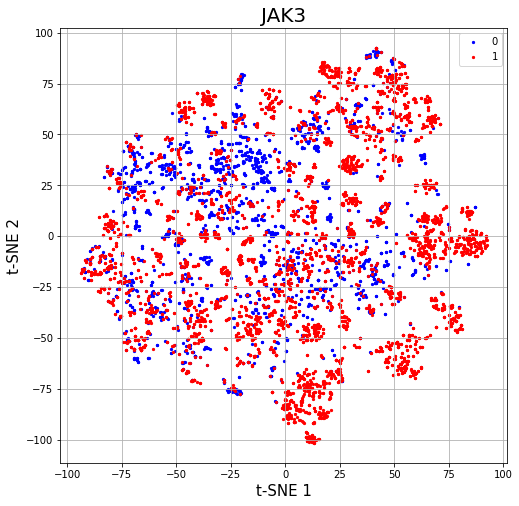

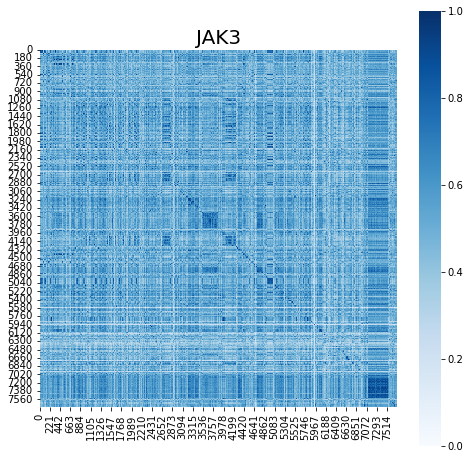

TYK2
data/TYK2_MACCS.csv
Drugs #:  2424
Active inhibitors #:  1627
Non inhibitors #:  797
Unspecified #:  0


/Users/uranaieiko_1/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/uranaieiko_1/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


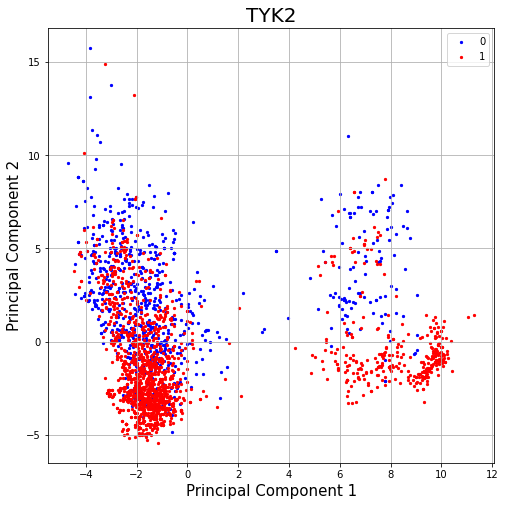

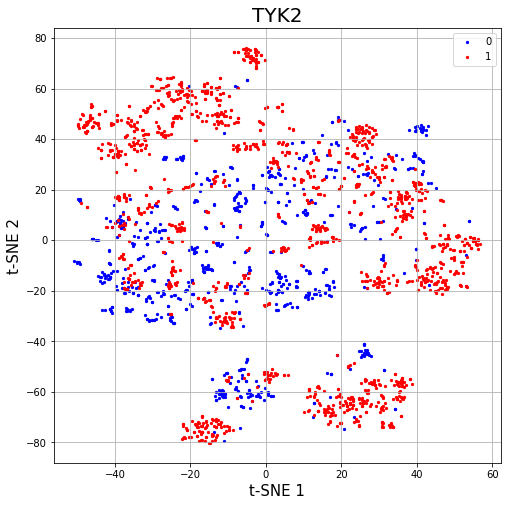

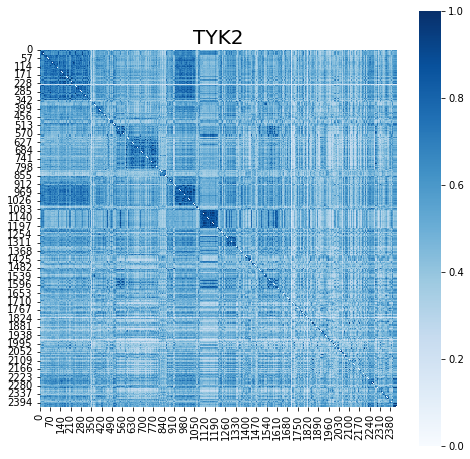

JAK1
data/JAK1_MACCS.csv
Drugs #:  7373
Active inhibitors #:  5606
Non inhibitors #:  1767
Unspecified #:  0


/Users/uranaieiko_1/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/uranaieiko_1/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


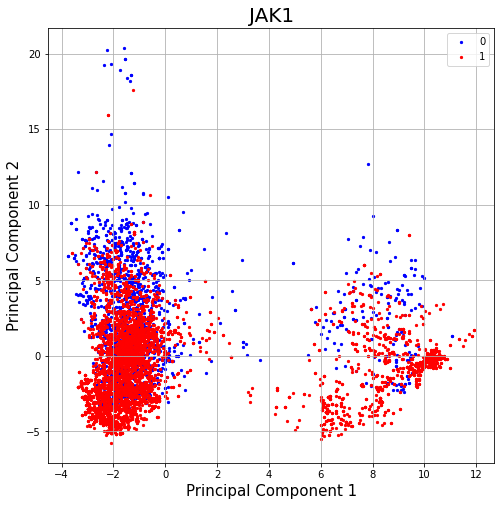

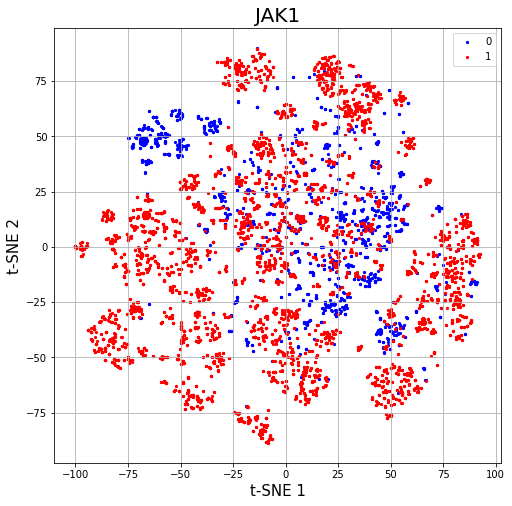

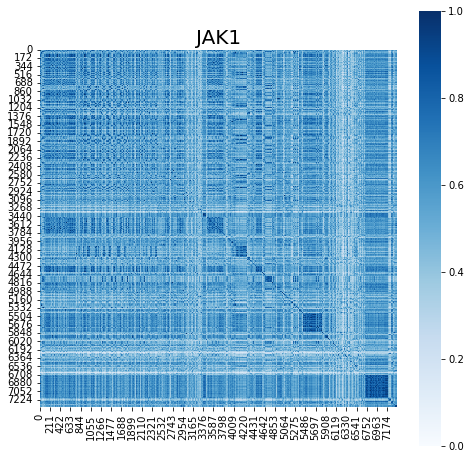

In [ ]:
enzymes = ['JAK1', 'JAK2', 'JAK3', 'TYK2']
global header
header = ['bit' + str(i) for i in range(167)]
from functions import count_category
for file in file_MACCS:
    enzyme = file.split('_')[0]
    if enzyme in enzymes:

        print(enzyme)
        print(path+file)
        data = pd.read_csv(path+file)
        count_category(data)
        X = data[header]
        y = data['Activity']
        smiles = data['Smiles']
        plot_PCA_0_1(X, y, enzyme, figure_path+'PCA_' + enzyme+'.png')
        plot_tSNE_0_1(X, y, enzyme, figure_path + 'tSNE_'+ enzyme+'.png')
        plot_tanimoto(smiles, enzyme, figure_path+ 'tanimoto_' + enzyme+'.png')
